# Building Machine Learning Pipelines

# Project Requirement is.

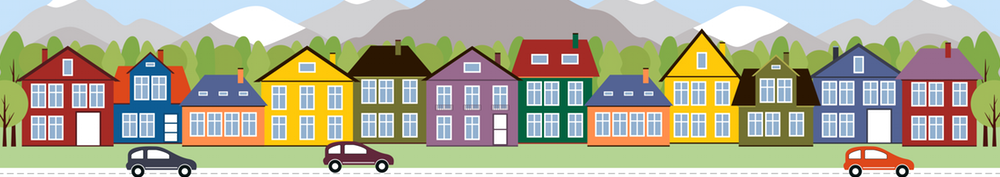

* We got requirement to build machine learning or deep learning model to predict house price. So they have provided the existing Customer information (Dataset) with lots of parameters/features.

* Each feature hold some information, We have to extract information and useful insights in order to give better price to customer to their selling houses.

* I will Use some standard approach to understand the data, extract insights from the data and remove negativly correlated features in order to get better accuracy and performance from our model.

* This Requirement falls under supervised regression problem, So lets Go....

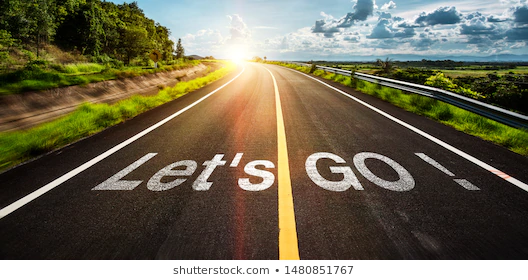

# Content
   **1. Importing Common libraries**
    
   **2. Importing Datasets**
   
   **3. Missing Values With and Without Missingno Library**
   
   **4. EDA (Exploratory Data Analysis)**

**Importing Common Libraries**

* I will import common libraries here, Rest of the libraries i will import wherever it required (ex: In normal ML projects we have different python files and each python will have different libraries). 

* It will be good pratice, if we don't put all libraries at one place.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 
# %matplotlib inline in jupyter notebook. if we use this command then we don't need to use plt.show()

**Importing Dataset**

In [5]:
dataset_train=pd.read_csv("train.csv")
dataset_test=pd.read_csv("test.csv")
my_submission=pd.read_csv("sample_submission.csv")

Let's analyse the raw train dataset.

In [7]:
dataset_train.head() # printing first 5 rows from train dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
dataset_train.shape # we have 1460 records and 81 features.

(1460, 81)

In [12]:
dataset_train.describe() # Understanding descriptive statistical for all numerical features

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Missing Values With and Without missingno Library

* Lets analyse the missing values without any library.

* First we get missing value features/variable.
* Second we will analyse how many missing values there in each cell.
* Third we will analyse % of missing in each feature.
* Fourth we will visualize missing values throug some graph plot like(**HeatMap,Matrix and Bar**)

In [16]:
# Getting all missing feature names and store in list
missing_values=[features for features in dataset_train.columns if dataset_train[features].isnull().sum()>1]


# missing value count
dataset_train[missing_values].isna().sum().sort_values(ascending=False) # sorting missing value sum descending order

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
dtype: int64

In [20]:
# missing value ratio
(dataset_train[missing_values].isnull().sum()*100.0/len(dataset_train)).round(2).sort_values(ascending=False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtCond         2.53
BsmtFinType1     2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64

In [21]:
! pip install missingno

The system cannot find the path specified.


In [22]:
# Creating dataframe with missing values feature to visualise the missing values by using missingno library
missing_dataframe=pd.DataFrame(dataset_train[missing_values])
missing_dataframe.head()

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN


# missingno library

In [28]:
# importing missingno library
import missingno as mn


# missingno library visuval graphs creating user defined function. so i can call this function give the plotname would be sufficient, 
# dataframe i make default dataframe as missing_dataframe. we can customize by provide dataframe then default dataframe will be overriden else viseversa.  
def missingno_LibraryMissingValuePlot(plotName,dataframe=missing_dataframe):
    if plotName.lower()=="matrix".lower():
        mn.matrix(dataframe)
    elif plotName.lower()=="bar".lower():
        mn.bar(dataframe)
    elif plotName.lower()=="heatMap".lower():
        mn.heatmap(dataframe)
    else: 
        print("Please Pass following names only {} or {} or {}".format("matrix","bar","heatmap"))

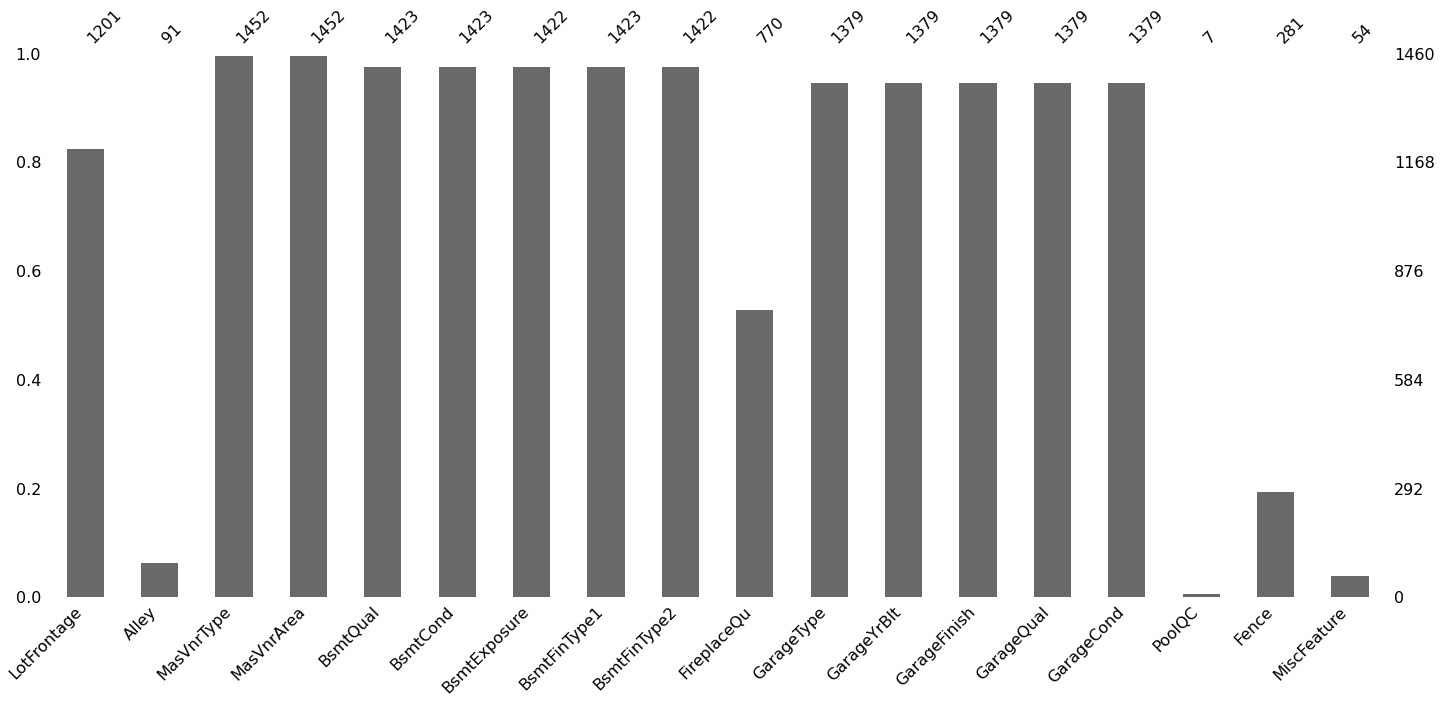

In [25]:
missingno_LibraryMissingValuePlot("bar") # visualising the bar plot using missingno library by calling user created function.

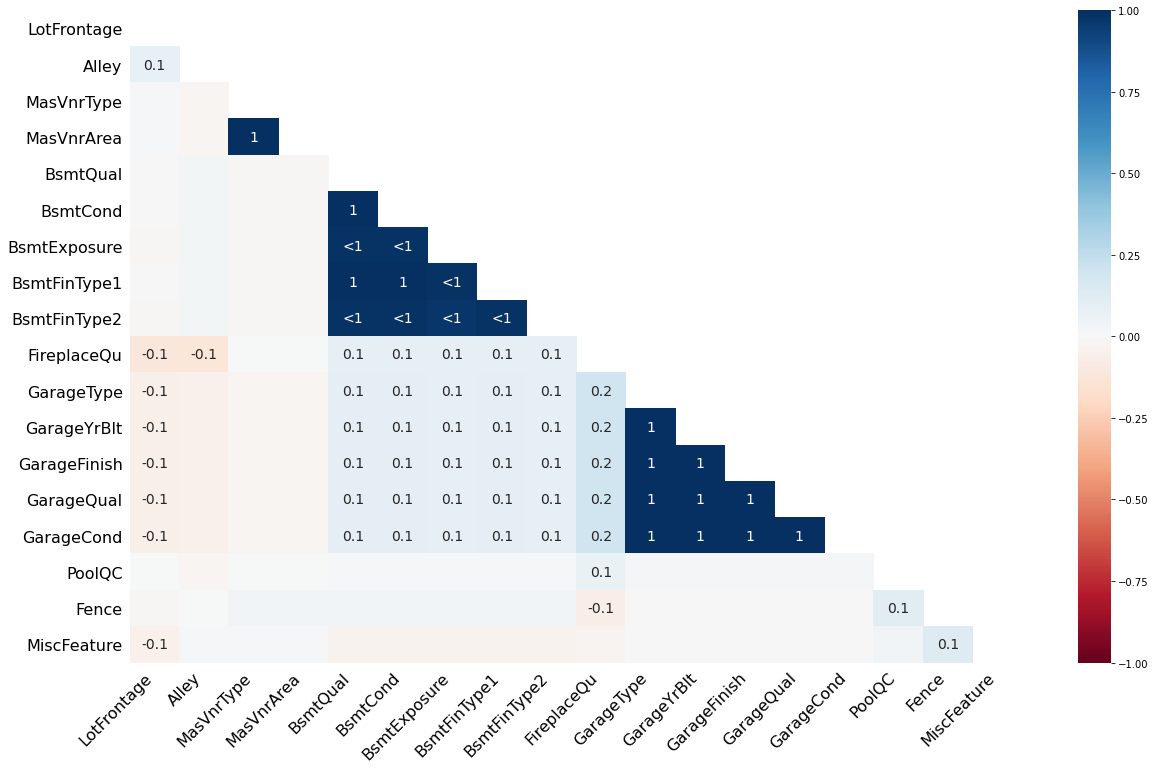

In [26]:
missingno_LibraryMissingValuePlot("heatmap") # heatmap visualising

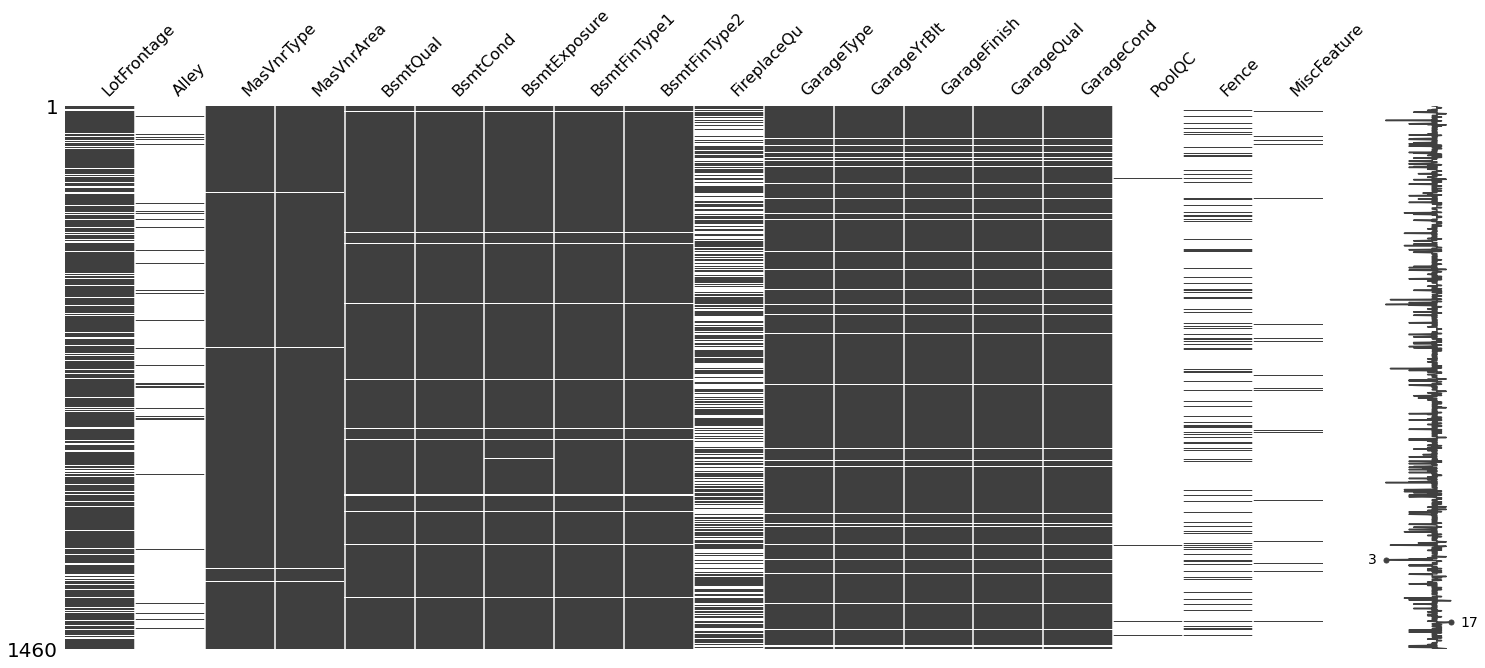

In [32]:
missingno_LibraryMissingValuePlot("matrix")
# There is a vertical lines on one hortizontal line on the right side of this diagram.
# That line plot indicates for each row's data completeness (each row missing count like 3 or 5 or 13 likewise). 
# In this dataset, all rows have 3 - 17 valid values and hence 0 - 14 missing values.

# EDA(Exploratory Data Analysis)